In [31]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

import math
import os
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
def display(img):
    dpi = 80
    im_data = img

    height, width  = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()


In [3]:

def preProcessing(myImage):
    grayImg = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(grayImg, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    print(f'The threshold valua applied to the image is: {ret} ')
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
    dilation = cv2.dilate(thresh1, horizontal_kernel, iterations=1)
    horizontal_contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    im2 = myImage.copy()
    for cnt in horizontal_contours:
        x, y, w, h = cv2.boundingRect(cnt)
        rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (255, 255, 255), 0)
    im2, vertical_contours = seg_word(rect)
    return im2, vertical_contours


def seg_word(wordImage):
    grayImg = cv2.cvtColor(wordImage, cv2.COLOR_BGR2GRAY)
    ret, thresh2 = cv2.threshold(grayImg, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    # create a Structuring Element size of 8*10 for the vertical contouring
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 10))
    # apply Dilation for once only
    dilation = cv2.dilate(thresh2, vertical_kernel, iterations=1)
    #fingd the vertical contours
    vertical_contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    word_img = wordImage.copy()
    # Run through each contour and extract the bounding box
    for cnt in vertical_contours:
        #computes the minimum rectangle
        x, y, w, h = cv2.boundingRect(cnt)
        # Draw a rectangular from the top left to the bottom right with the
        # given Coordinates x,y and height and width
        rect = cv2.rectangle(word_img, (x, y), (x + w, y + h), (0, 255, 0), 0)
    # apply a Character Segmentation and return the output Image

    return word_img, vertical_contours

In [4]:
# Define the paths to the folders
italics_folder = 'output_images'
normal_folder = 'normal_images'
italics_underlined = 'underlined_italics_images'
italics_strike = 'strikethrough_italics_images'

# Initialize empty lists for data and labels
X_data = []
Y_data = []

# Load images from italics folder
for i in range(1, 4001):
    # Construct the image path
    image_path = os.path.join(italics_folder, f'image_{i}.png')

    # Open the image and convert it to grayscale
    image = Image.open(image_path)
    image = np.array(image)
    # gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # binary_image = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # Append the image data and label to the lists
    X_data.append(image)
    Y_data.append(1)

for i in range(1, 1001):
    image_path = os.path.join(italics_underlined, f'image_{i}.png')
    image_path_1 = os.path.join(italics_strike, f'image_{i}.png')
    

    image = Image.open(image_path)
    image = np.array(image)

    image1 = Image.open(image_path_1)
    image1 = np.array(image)

    X_data.append(image)
    Y_data.append(1)

    X_data.append(image1)
    Y_data.append(1)



# Load images from normal folder
for i in range(1, 4001):
    # Construct the image path
    image_path = os.path.join(normal_folder, f'image_{i}.png')

    # Open the image and convert it to grayscale
    image = Image.open(image_path)
    image = np.array(image)
    # gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # binary_image = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # Append the image data and label to the lists
    X_data.append(image)
    Y_data.append(0)

# Convert lists to numpy arrays
Y_data = np.array(Y_data)

In [5]:
print(len(X_data))
print(len(Y_data))

10000
10000


In [6]:
X_data1 = []
for i in range(len(X_data)):
    ## segmentation
    image = X_data[i]
    im2, vertical_contours = preProcessing(image)
    # display(im2)
    x = y = w = h = 0
    for cnt in vertical_contours:
        x, y, w, h = cv2.boundingRect(cnt)
    
    word = X_data[i][y:y+h, x:x+w]
    # display(word)
    X_data1.append(word)
    print(i)
    # display(im2)

The threshold valua applied to the image is: 141.0 
0
The threshold valua applied to the image is: 141.0 
1
The threshold valua applied to the image is: 142.0 
2
The threshold valua applied to the image is: 140.0 
3
The threshold valua applied to the image is: 141.0 
4
The threshold valua applied to the image is: 141.0 
5
The threshold valua applied to the image is: 141.0 
6
The threshold valua applied to the image is: 141.0 
7
The threshold valua applied to the image is: 140.0 
8
The threshold valua applied to the image is: 141.0 
9
The threshold valua applied to the image is: 142.0 
10
The threshold valua applied to the image is: 141.0 
11
The threshold valua applied to the image is: 142.0 
12
The threshold valua applied to the image is: 142.0 
13
The threshold valua applied to the image is: 140.0 
14
The threshold valua applied to the image is: 141.0 
15
The threshold valua applied to the image is: 141.0 
16
The threshold valua applied to the image is: 141.0 
17
The threshold valua 

In [7]:
print(X_data1[0].shape)

(33, 119, 3)


In [8]:
X_data = []
for i in range(len(X_data1)):
    image = X_data1[i]
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    binary_image = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    X_data.append(binary_image)

In [9]:
X_data[0].shape

(33, 119)

In [21]:
## bicubic interpolation to make all the images of same sizeimport numpy as np
from PIL import Image

new_size = (32,128)

resized_images = []
for image in X_data:
  resized_image = Image.fromarray(image).resize(new_size, Image.BICUBIC)
  resized_images.append(np.array(resized_image))

X_data = np.array(resized_images)

In [22]:
print(X_data[0].shape)

(128, 32)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 4)

In [24]:
len(X_test)

2000

In [25]:
len(y_test)

2000

In [26]:
X_train[0].shape

(128, 32)

In [16]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
from sklearn.tree import DecisionTreeClassifier

In [17]:
batch_size = 16
nb_classes =2
nb_epochs = 10
img_rows, img_columns = 64, 64
img_channel = 1
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((32, 128, 1), input_shape=(32, 128)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)  # Output classes = 2
])

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 32, 128, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 128, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 32, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 32, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,058,530 (4.04 MB)

 Trainable params: 1,058,530 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.7709 - loss: 0.4874 - val_accuracy: 0.8960 - val_loss: 0.2696
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.8118 - loss: 0.3864 - val_accuracy: 0.8650 - val_loss: 0.3768
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.8468 - loss: 0.3528 - val_accuracy: 0.9705 - val_loss: 0.1001
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9255 - loss: 0.1803 - val_accuracy: 0.9590 - val_loss: 0.0956
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9402 - loss: 0.1418 - val_accuracy: 0.9400 - val_loss: 0.1546
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9429 - loss: 0.1394 - val_accuracy: 0.9595 - val_loss: 0.1111
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9623 - loss: 0.0976 - val_accuracy: 0.9895 - val_loss: 0.0371
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9685 - loss: 0.0813 - 

Test Score: 0.039260346442461014
Test Accuracy: 0.9865000247955322
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


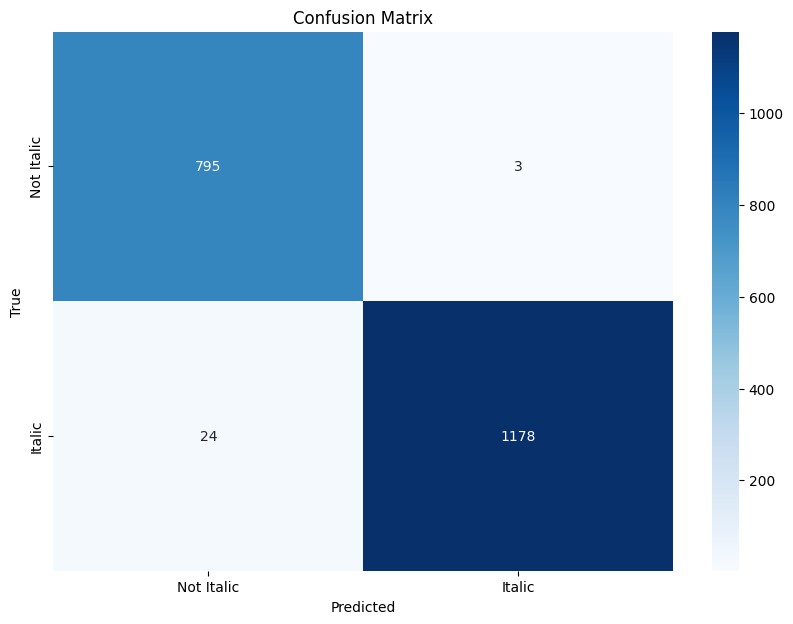

In [33]:
# score = model.evaluate(X_test, y_test, verbose = 0 )
# print("Test Score: ", score[0])
# print("Test accuracy: ", score[1])


# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Italic', 'Italic'], yticklabels=['Not Italic', 'Italic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       798
           1       1.00      0.98      0.99      1202

    accuracy                           0.99      2000
   macro avg       0.98      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



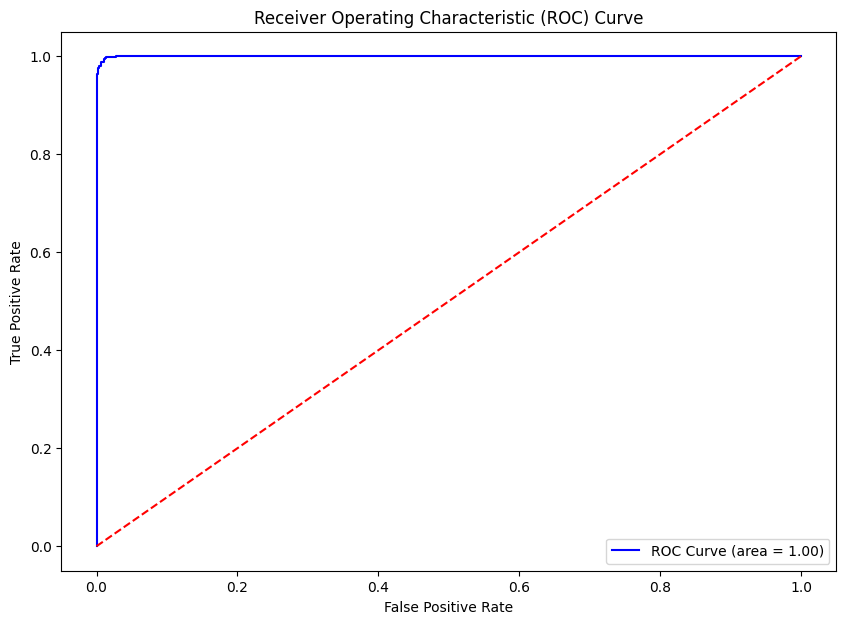

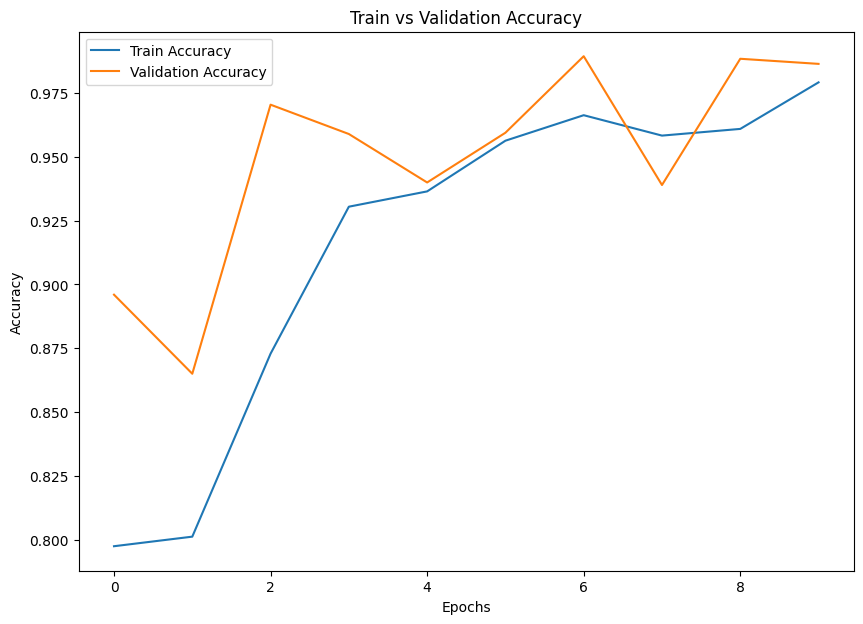

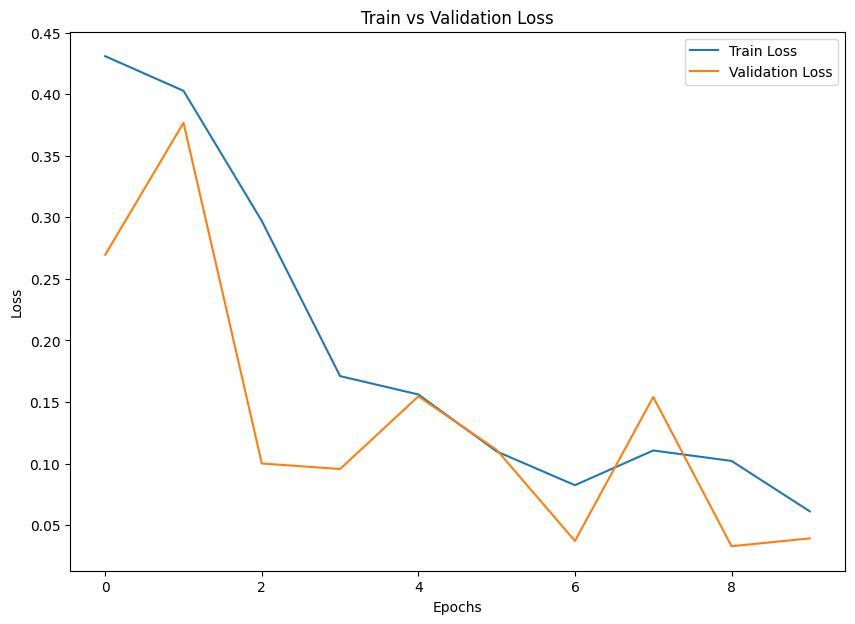

In [36]:
fpr, tpr, _ = roc_curve(y_true, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

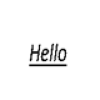

In [22]:
test_img = cv2.imread("test_1.jpg")
gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
binary_image = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
resized_image = Image.fromarray(binary_image).resize(new_size, Image.BICUBIC)
test_img = np.array(resized_image)
display(test_img)
test_array = [test_img]
test = np.array(test_array)

In [23]:
print(test.shape)

(1, 64, 64)


In [24]:
predictions = model.predict(test)
predicted_class = np.argmax(predictions)

print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 110ms/step
Predicted class: 1
